# Machine Learning
* What is it?
    * Giving computers the ability to learn and make decisions from data
    * without explicit programming
    * Examples:
        * is the email spam or not spam?
        * clustering wikipedia entries into different categories
* Supervised Learning utilizes labeled data
* Unsupervised learning learns patterns in data and clusters the data based on the patterns



# Supervised Learning
### EDA

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
iris.data.shape

(150, 4)

### samples are in rows, features are in columns

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris.data
y = iris.target

In [6]:
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


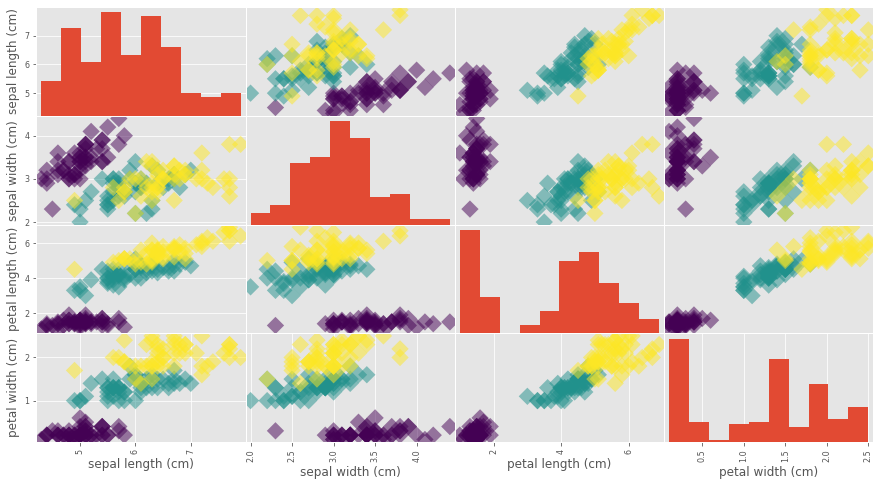

In [8]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[15,8], s=150, marker='D')

# The classification challenge 

### k-nearest neighbors
* predicts labels of a data point by:
    * looking at the 'k' closest labeled data points
    * takes a majority vote

In [9]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

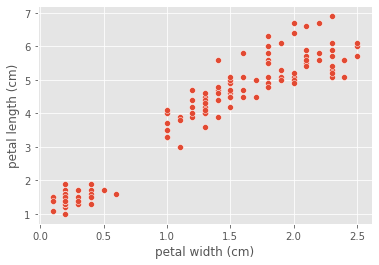

In [11]:
sns.scatterplot(x='petal width (cm)', y = 'petal length (cm)', data=df)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [15]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])

In [16]:
prediction = knn.predict(X_new)

In [17]:
prediction

array([1, 1, 0])

In [18]:
X_new.shape

(3, 4)

### Measuring Model Performance

* in classification, accuracy is a common metric
* accuracy = fraction of correct predictions
* which data should be used to compute accuracy?
* We are actually interested in how well the model will perform on new, unseen data.
    * we must split data into 2 sets
        * training
        * test


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

(105, 4)